# EE675A - Assignment 1

**Name**: *Yash Barjatya*  <br />
**Roll No**: *201138*
***
## Instructions

- **Release Date**: **21st Jan 2024**  
- **Deadline**: **Part A : 28th Jan 2024 11:59PM**
- Kindly name your submission files as `RollNo_Name_A1_PartA.ipynb`, based on the part you are submitting. Marks will be deducted for all submissions that do not follow the naming guidelines. <br />
- You are required to work out your answers and submit only the iPython Notebook. The code should be well commented and easy to understand as there are marks for this. This notebook can be used as a template for assignment submission. <br />
- Submissions are to be made through HelloIITK portal. Submissions made through mail will not be graded.<br />
- Answers to the theory questions if any should be included in the notebook itself. While using special symbols use the $\LaTeX$ mode <br />
- Make sure your plots are clear and have title, legends and clear lines, etc. <br />
- Plagiarism of any form will not be tolerated. If your solutions are found to match with other students or from other uncited sources, there will be heavy penalties and the incident will be reported to the disciplinary authorities. <br />
- In case you have any doubts, feel free to reach out to TAs for help. <br />

***
# Part A: Chernoff Bound

Suppose $X_1, X_2, \cdots, X_n$ are i.i.d. copies of a $\mathcal{N}(0,\sigma^2)$ r.v. Then for $X = \frac{1}{n} \sum_{i=1}^n X_i$ we know that $$ \mathbb{P} [X \geq \epsilon] \leq \exp\left(\dfrac{-n\epsilon^2}{2\sigma^2}\right)  $$

Write a Python code to run Monte Carlo simulations that verify the inequality. Specifically, for a given  $\epsilon$ and $\sigma$, generate $n$ samples from the zero mean Gaussian distribution $x_1, x_2, \dots, x_n$ and check whether the sample average is more than $\epsilon$. Repeat this experiment 500 times and observe in how many experiments out of those 500 experiments, the sample average is more than $\epsilon$. This will gives us an empirical estimate of ${P}[X\geq \epsilon]$.

Take $\sigma = 0.1,~ \epsilon = 0.05$, and plot the empirical estimate as a function of $n \in \{100, 200, \dots, 1000\}$. In the same plot, include the Chernoff upper bound as a function of $n$. `[10 Marks]`

In [7]:
# libraries
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Define parameters
sigma = 0.1
epsilon = 0.05
n_values = np.arange(1, 51, 1)
n_sims = 500

**Monte Carlo simulation and Chernoff upper bound calculation**

In [4]:
# Initialize lists to store results
empirical_probs = []
chernoff_bounds = []

for n in n_values:
  # Count the number of simulations where the sample mean is greater than epsilon
  n_successes = 0
  for _ in range(n_sims):
    samples = np.random.normal(0,sigma,size=n)
    sample_mean = np.mean(samples)
    if sample_mean >= epsilon:
      n_successes += 1
  
  # Calculate empirical probability
  empirical_prob = n_successes / n_sims
  empirical_probs.append(empirical_prob)

  # Calculate Chernoff upper bound
  chernoff_bound = np.exp(-n * epsilon**2 / (2 * sigma**2))
  chernoff_bounds.append(chernoff_bound)


**Let us now plot the result**

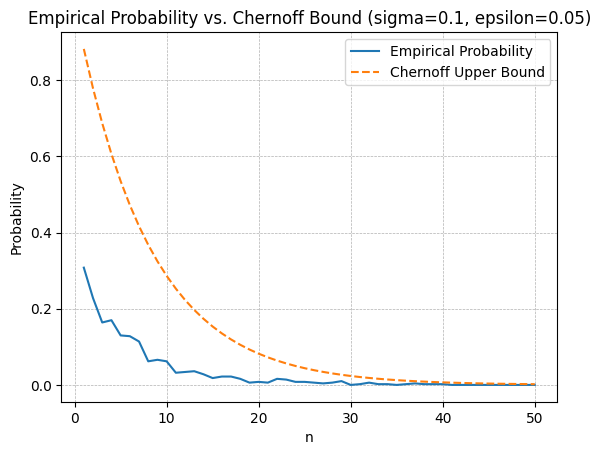

In [6]:
# Plot results
plt.plot(n_values, empirical_probs,  linestyle='-', label="Empirical Probability")
plt.plot(n_values, chernoff_bounds, linestyle='--', label="Chernoff Upper Bound")

plt.xlabel("n")
plt.ylabel("Probability")
plt.title("Empirical Probability vs. Chernoff Bound (sigma=0.1, epsilon=0.05)")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.show()